# LightGBM 분류 기본 코드

## #01. 준비작업

### [1] 패키지 가져오기

```shell
$ pip install lightgbm
```

In [9]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
from hossam.regression import *

from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## #02. 분류분석

### [1] 데이터 가져오기 + 기본 데이터 처리

In [10]:
origin = my_read_excel(
    path="https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx",
    categories=["Outcome"],
    info=False,
)

# 정제 대상 필드명
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# 0값을 결측치로 대체후 평균으로 다시 치환
df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df2 = my_replace_missing_value(df)

# 훈련/검증 데이터 분할 및 데이터 표준화
x_train, x_test, y_train, y_test = my_train_test_split(df2, "Outcome", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


상위 5개 행
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------|
|  0 |             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
|  1 |             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
|  2 |             8 |       183 |              64 |               0 |         0 |  23.3 |                      0.672 |    32 |         1 |
|  3 |             1 |        89 |              66 |              23 |        94 |  28.1 |                      0.167 |    21 |         0 |
|  4 |     

((614, 8), (154, 8), (614,), (154,))

### [2] LightGBM 모델 적합

| 하이퍼파라미터          | 기능 설명                                                                 | 기본값 | 추천사항                                                      | 추천값                  |
|---------------------|----------------------------------------------------------------------|-------|-------------------------------------------------------------|----------------------|
| `num_leaves` | 하나의 트리가 가질 수 있는 최대 리프의 수                                       | 31    | 과적합을 방지하기 위해 적절한 수준으로 설정                                 | 20-40                 |
| `max_depth` | 트리의 최대 깊이, 과적합을 방지하기 위해 사용                                   | -1    | 큰 값으로 설정 시 더 깊은 트리 생성, -1은 제한 없음을 의미                           | 5-8                   |
| `learning_rate` | 학습률, 각 부스팅 스텝에서의 축소를 얼마나 강하게 할지 결정                         | 0.1   | 낮은 값으로 설정하여 점진적으로 학습, 더 많은 트리 필요                           | 0.01-0.1              |
| `n_estimators` | 부스팅 라운드의 수                                                        | 100   | 충분히 큰 값으로 설정하여 모델을 완전히 학습                                   | 100-1000              |
| `min_child_samples` | 결정 트리의 리프 노드가 되기 위해 필요한 최소 샘플 수                               | 20    | 과적합 방지를 위해 조절                                                | 10-30                 |
| `min_child_weight` | 자식에 필요한 모든 관측치의 가중치 합의 최소값, 과적합 조절에 사용                    | 0.001 | 과적합을 방지하기 위한 값 조정에 사용                                        | 0.001-0.1             |
| `subsample` | 각 트리를 구성할 때 사용되는 데이터 샘플의 비율, 과적합 방지                        | 1.0   | 0.8-1.0 사이로 설정하면 더 좋은 성능을 기대할 수 있음                              | 0.8-1.0               |
| `colsample_bytree` | 각 트리를 구성할 때 사용되는 피처의 비율, 과적합 방지                              | 1.0   | 0.6-0.9 사이로 설정하면 더 좋은 성능을 기대할 수 있음                              | 0.6-0.9               |
| `reg_alpha` | L1 정규화 용어에 대한 가중치, 과적

In [11]:
estimator = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64, 
    n_jobs=get_n_jobs(),
    random_state=get_random_state())

estimator.fit(x_train, y_train, eval_metric='error', eval_set=[(x_train, y_train), (x_test, y_test)])

LGBMClassifier(n_estimators=1000, n_jobs=-1, num_leaves=64, random_state=0)

### [3] 분류 결과

#### (1) 예측값

In [12]:
estimator.predict(x_test)

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

#### (2) 예측확률

In [13]:
estimator.predict_proba(x_test)[:, 1]

array([9.99912230e-01, 2.22990003e-04, 4.49658657e-08, 9.99959678e-01,
       1.40671653e-06, 3.01795306e-08, 9.99728758e-01, 9.99999748e-01,
       1.53151763e-03, 6.04219721e-03, 9.95670558e-01, 9.99932799e-01,
       2.21463980e-07, 4.39949016e-04, 2.96039454e-01, 9.95644366e-01,
       9.99998641e-01, 1.39433074e-08, 1.83709559e-02, 9.33598266e-04,
       8.83564961e-01, 1.00873526e-07, 8.78626323e-04, 1.32954406e-03,
       3.79865939e-12, 9.78537872e-01, 5.47172690e-11, 9.99305068e-01,
       1.15997663e-08, 1.99639525e-06, 2.70079195e-01, 2.96700349e-04,
       1.83350239e-03, 9.99588543e-01, 5.87509860e-07, 9.99988955e-01,
       3.88685203e-01, 6.60098143e-09, 4.14189803e-01, 9.99956375e-01,
       9.50820541e-01, 2.01671232e-08, 4.83120668e-05, 9.99893569e-01,
       9.99882582e-01, 8.32252886e-06, 4.16006133e-07, 4.89153694e-05,
       1.88386814e-01, 2.92278931e-05, 2.39422366e-02, 2.32257791e-04,
       9.99018212e-01, 9.98824715e-01, 8.48780480e-07, 3.94827745e-09,
      

### [4] 성능평가

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |     0.811688 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |         0.68 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |     0.723404 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |            0 |     0.149533 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |            1 |     0.850467 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |            1 |     0.701031 | 정밀도와 재현율의 조화평균                                |
| AUC               |            1 |     0.821237 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--

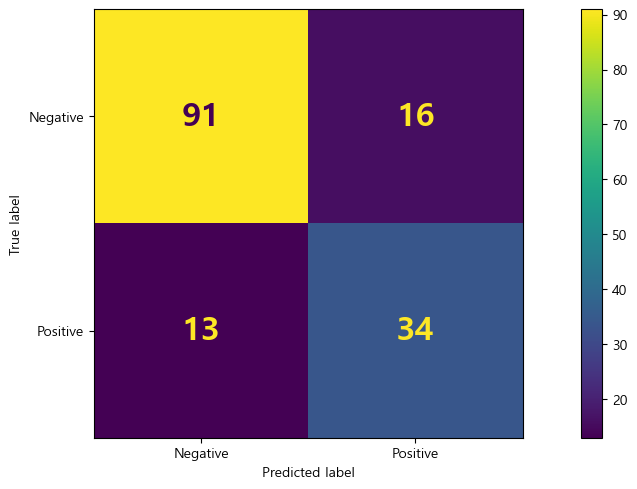


[Roc Curve]


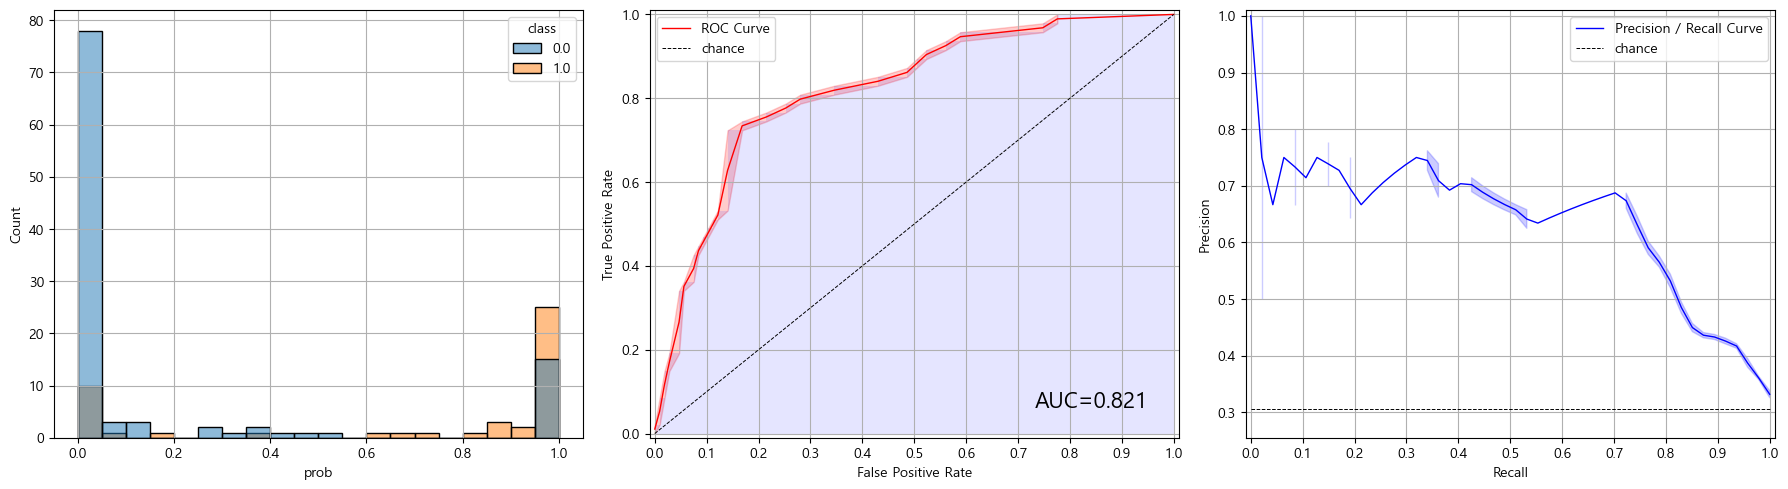


[학습곡선]


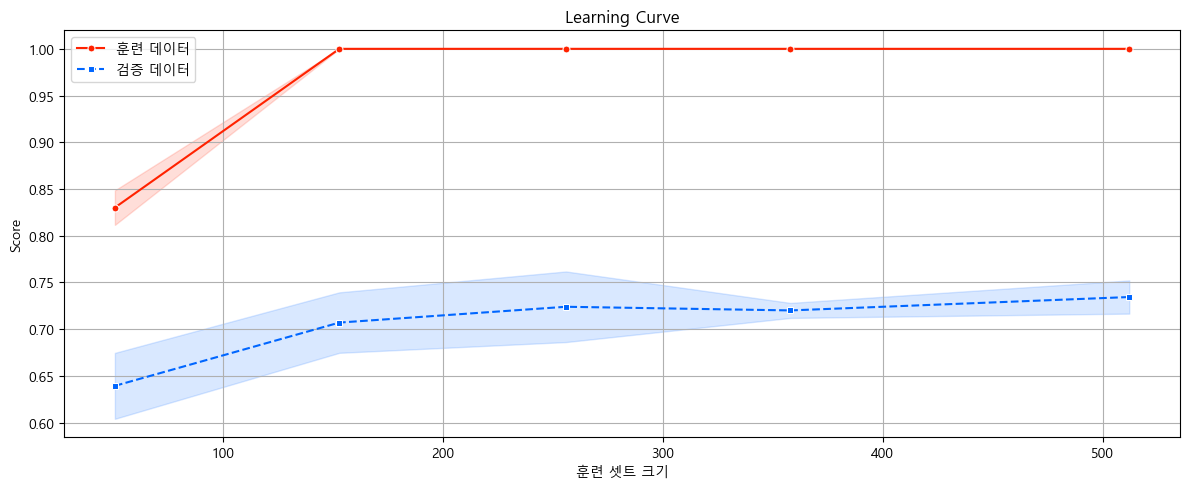

In [14]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)

### [5] 독립변수 보고

In [15]:
my_classification_report(estimator, x_train, y_train, x_test, y_test)

+----+------------+--------------------------+---------+
|    | 종속변수   | 독립변수                 |     VIF |
|----+------------+--------------------------+---------|
|  0 | Outcome    | Pregnancies              | 1.53706 |
|  1 | Outcome    | Glucose                  | 1.33393 |
|  2 | Outcome    | BloodPressure            | 1.25589 |
|  3 | Outcome    | SkinThickness            |  1.5504 |
|  4 | Outcome    | Insulin                  | 1.28711 |
|  5 | Outcome    | BMI                      | 1.52814 |
|  6 | Outcome    | DiabetesPedigreeFunction | 1.05376 |
|  7 | Outcome    | Age                      | 1.64872 |
+----+------------+--------------------------+---------+


## #03. 회귀분석

### [1] 데이터 가져오기

In [16]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)
x_train, x_test, y_train, y_test = my_train_test_split(origin, "MEDV", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 

((404, 13), (102, 13), (404,), (102,))

### [2] 학습 모델 적합

In [17]:
estimator = LGBMRegressor(
    n_estimators=1000,
    num_leaves=64, 
    n_jobs=get_n_jobs(),
    random_state=get_random_state())

estimator.fit(x_train, y_train, eval_metric='rmse', eval_set=[(x_train, y_train), (x_test, y_test)])

LGBMRegressor(n_estimators=1000, n_jobs=-1, num_leaves=64, random_state=0)

### [3] 결과 확인

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.999951 |     0.701669 |
| 평균절대오차(MAE)             |    0.0311199 |      2.91285 |
| 평균제곱오차(MSE)             |   0.00421084 |      24.2927 |
| 평균오차(RMSE)                |     0.064891 |      4.92876 |
| 평균 절대 백분오차 비율(MAPE) |     0.153739 |      13.1967 |
| 평균 비율 오차(MPE)           |   -0.0102835 |     -2.36032 |
+-------------------------------+--------------+--------------+

[학습곡선]


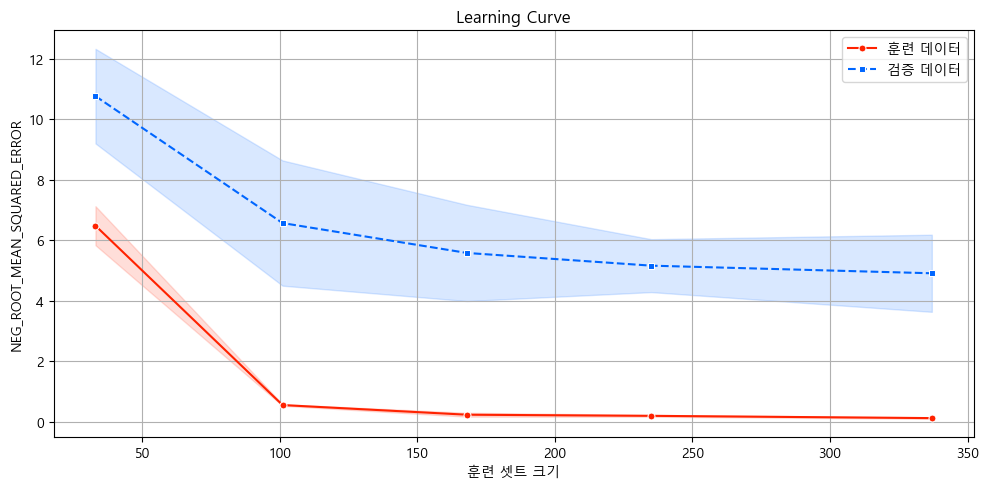

In [18]:
my_regression_result(estimator, x_train, y_train, x_test, y_test)

### [4] 독립변수 보고

In [19]:
my_regression_report(estimator, x_train, y_train, x_test, y_test)

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS      |  4.9238 |
|  3 | MEDV       | CHAS       | 1.32047 |
|  4 | MEDV       | NOX        | 4.17384 |
|  5 | MEDV       | RM         | 1.82706 |
|  6 | MEDV       | AGE        | 2.93317 |
|  7 | MEDV       | DIS        | 4.41185 |
|  8 | MEDV       | RAD        | 9.98804 |
|  9 | MEDV       | TAX        | 10.5503 |
| 10 | MEDV       | PTRATIO    | 1.88398 |
| 11 | MEDV       | B          |  1.5563 |
| 12 | MEDV       | LSTAT      |  2.8052 |
+----+------------+------------+---------+

